# Problem Statement: 
## You are tasked with analyzing the World Happiness Report 2021 dataset to uncover insights into global happiness levels.
## The dataset includes various factors such as GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption, all of which potentially influence the happiness scores (Ladder Score) of countries.
## Your goal is to create visualizations that highlight the relationships and distributions of these factors, and to identify which factors are most strongly associated with higher happiness scores.

### PS1: How is the distribution of happiness scores (Ladder Score) across different regions?
### PS2: What is the correlation between different factors in the dataset?
### PS3: Which are the top 10 happiest countries according to the Ladder Score?
### PS4: What is the relationship between GDP per capita and the happiness score?
### PS5: How do various factors in the dataset relate to each other and to the happiness score?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\adity\Downloads\world-happiness-report-2021.csv")
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
#Two categorcial columns and rest are nummerical columns

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924e+00,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,2.200120e-02,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330e+00,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879e+00,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601e+00,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,1.148890e-01,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043e+00,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,1.133318e-01,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,1.506567e-01,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,1.792263e-01,0.082,0.667,0.781,0.845,0.939


In [6]:
#able to see the min,max,std and the value of features at different % intervals

# Question1: How is the distribution of happiness scores (Ladder Score) across different regions?

In [7]:
sns.set(style = "whitegrid")

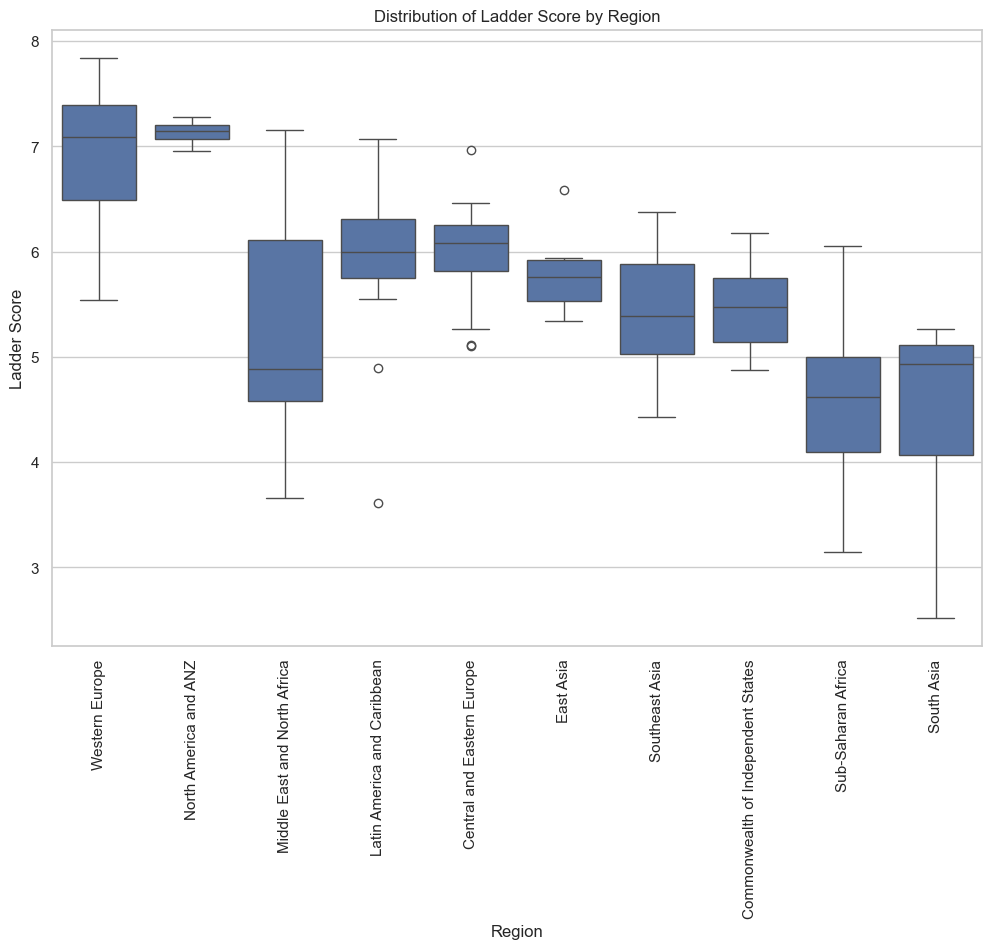

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Regional indicator', y='Ladder score', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Ladder Score by Region')
plt.xlabel('Region')
plt.ylabel('Ladder Score')
plt.show()

# Explanation:
**Purpose: To show the distribution of happiness scores across different regions.**

**Visualization: A box plot that displays the spread of Ladder Scores within each region.**

**Insight: This helps identify regions with higher or lower happiness scores and the variation within each region.**

**Conclusion : Here, we can conclude that the countries which falls in the Western Europe region has the highest Happiness Score (Ladder score) falling between ~6.5 to 7.5 range.**

# Question2: What is the correlation between different factors in the dataset?

In [9]:
numeric_columns = ['Ladder score',
                   'Standard error of ladder score',
                   'upperwhisker', 'lowerwhisker',
                   'Logged GDP per capita',
                   'Social support',
                   'Healthy life expectancy',
                   'Freedom to make life choices',
                   'Generosity',
                   'Perceptions of corruption',
                   'Ladder score in Dystopia',
                   'Explained by: Log GDP per capita',
                   'Explained by: Social support',
                   'Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices',
                   'Explained by: Generosity',
                   'Explained by: Perceptions of corruption',
                   'Dystopia + residual']

In [10]:
correlation = df[numeric_columns].corr()

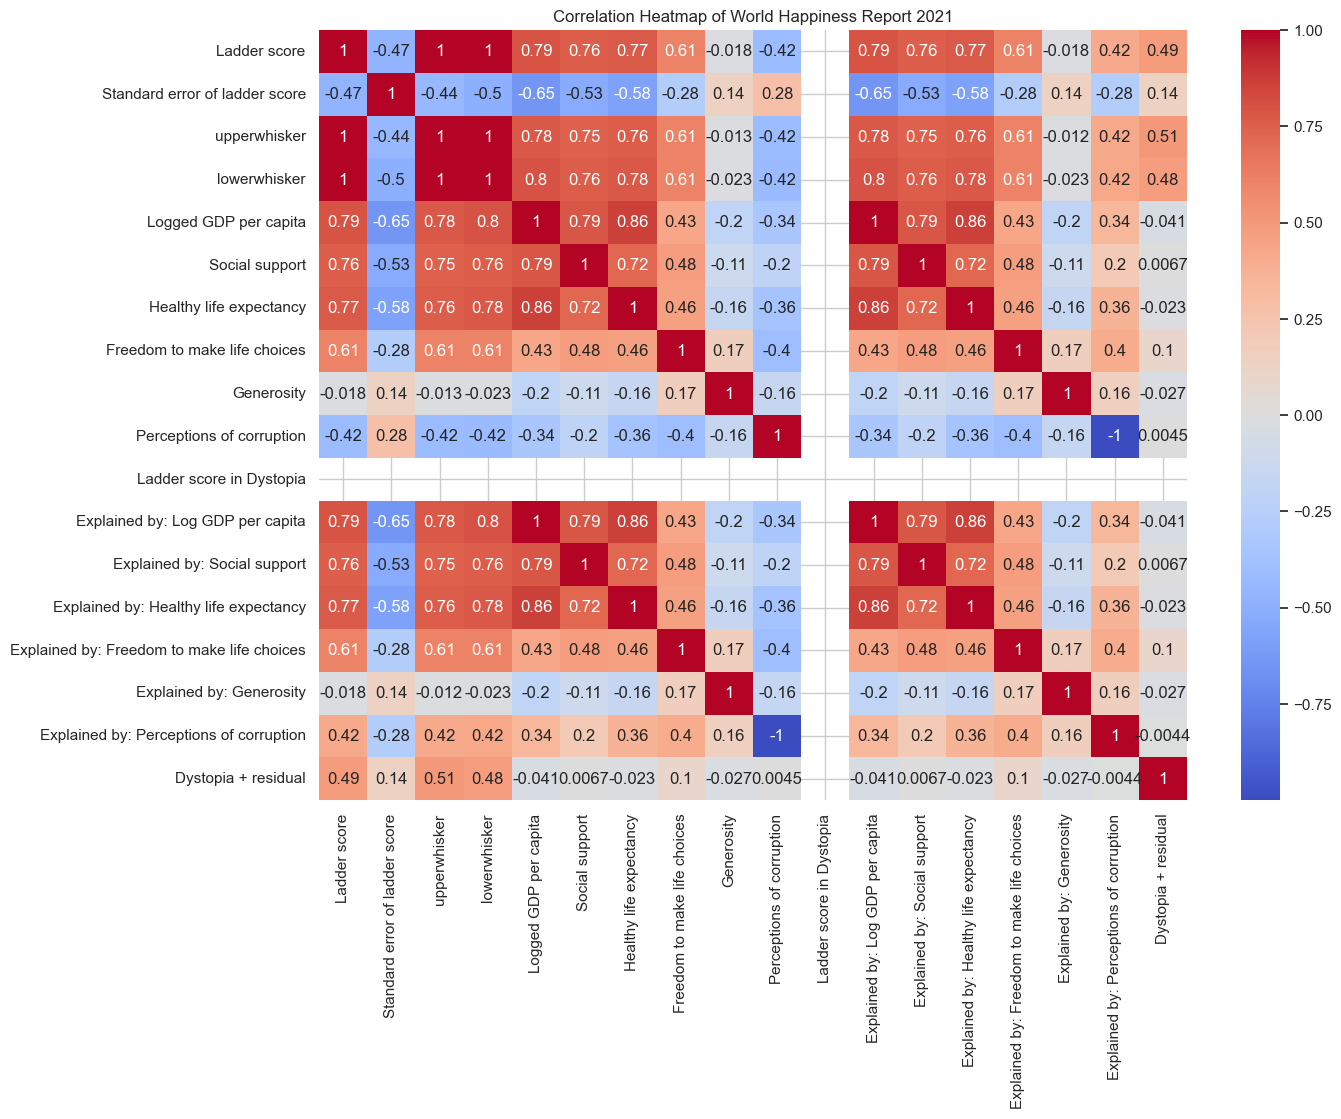

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of World Happiness Report 2021')
plt.show()

# Explanation:

**Purpose: To display the correlation between different numerical variables in the dataset.**

**Visualization: A heatmap where the color intensity indicates the strength of correlation.**

**Insight: Identifies which factors are most strongly associated with the happiness score.** 

**Conclusion: Features which are directly propotional to each other have greater/stronger relation**

# Question3: Which are the top 10 happiest countries according to the Ladder Score?

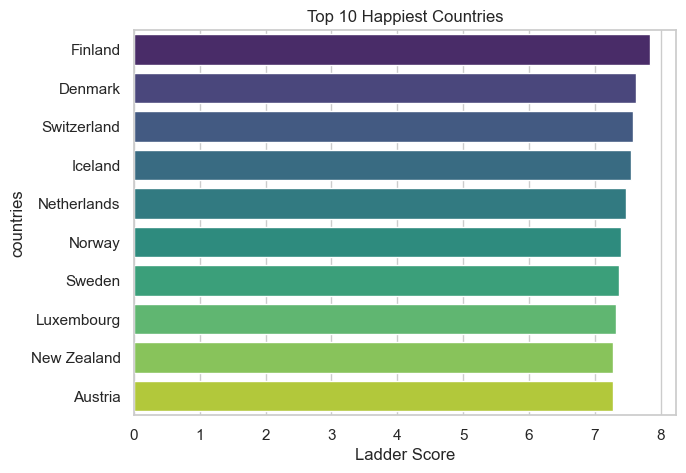

In [15]:
top_10_happiest = df.nlargest(10, 'Ladder score')
plt.figure(figsize=(7, 5))
sns.barplot(x='Ladder score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Ladder Score')
plt.ylabel('countries')
plt.show()

# Explanation:

**Purpose: To highlight the top 10 countries with the highest happiness scores.**

**Visualization: A horizontal bar plot showing the Ladder Scores of the top 10 happiest countries.**

**Insight: Provides a quick comparison of the happiest countries in the dataset.**

**Conclusion: From the above visualization we can conclude that the countries residing in the western europe region has the highest happiness score**

# Question4: What is the relationship between GDP per capita and the happiness score?

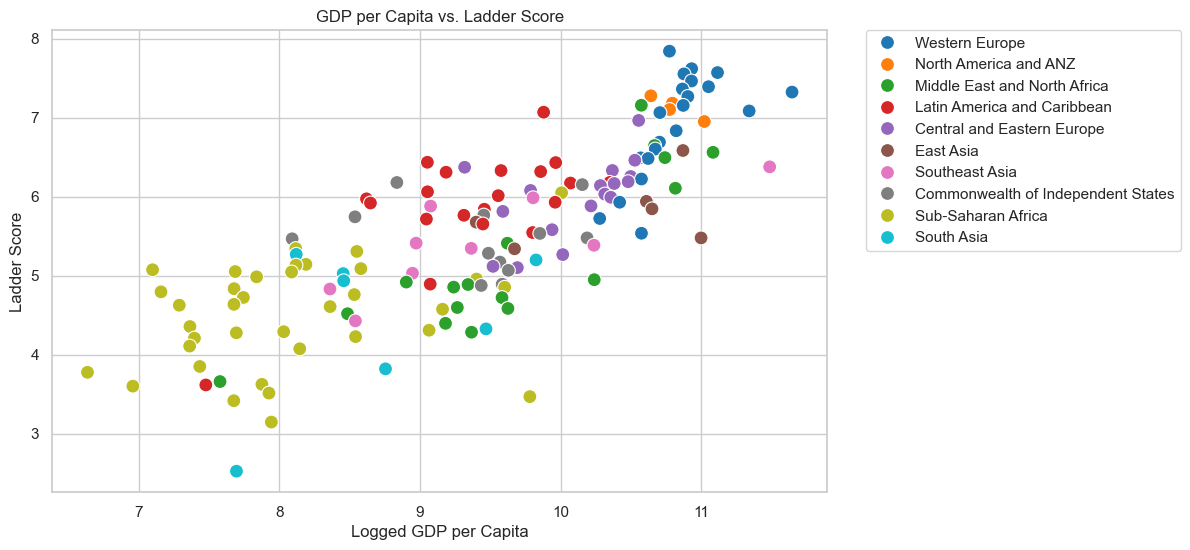

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=df, hue='Regional indicator', palette='tab10', s=100)
plt.title('GDP per Capita vs. Ladder Score')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Ladder Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad=0.)
plt.show()

# Explanation:

**Purpose: To show the relationship between GDP per capita and the happiness score.**

**Visualization: A scatter plot where each point represents a country, color-coded by region.**

**Insight: Helps determine if wealthier countries tend to have higher happiness scores and how this relationship varies by region.**

**Conclusion: By the above visualiztion, we can conclude that the region which has higher GDP (i.e. Western Europe) has a better Happiness Score whereas, countries with low GDP has less Happiness score.**

# Question5: How do various factors in the dataset relate to each other and to the happiness score?

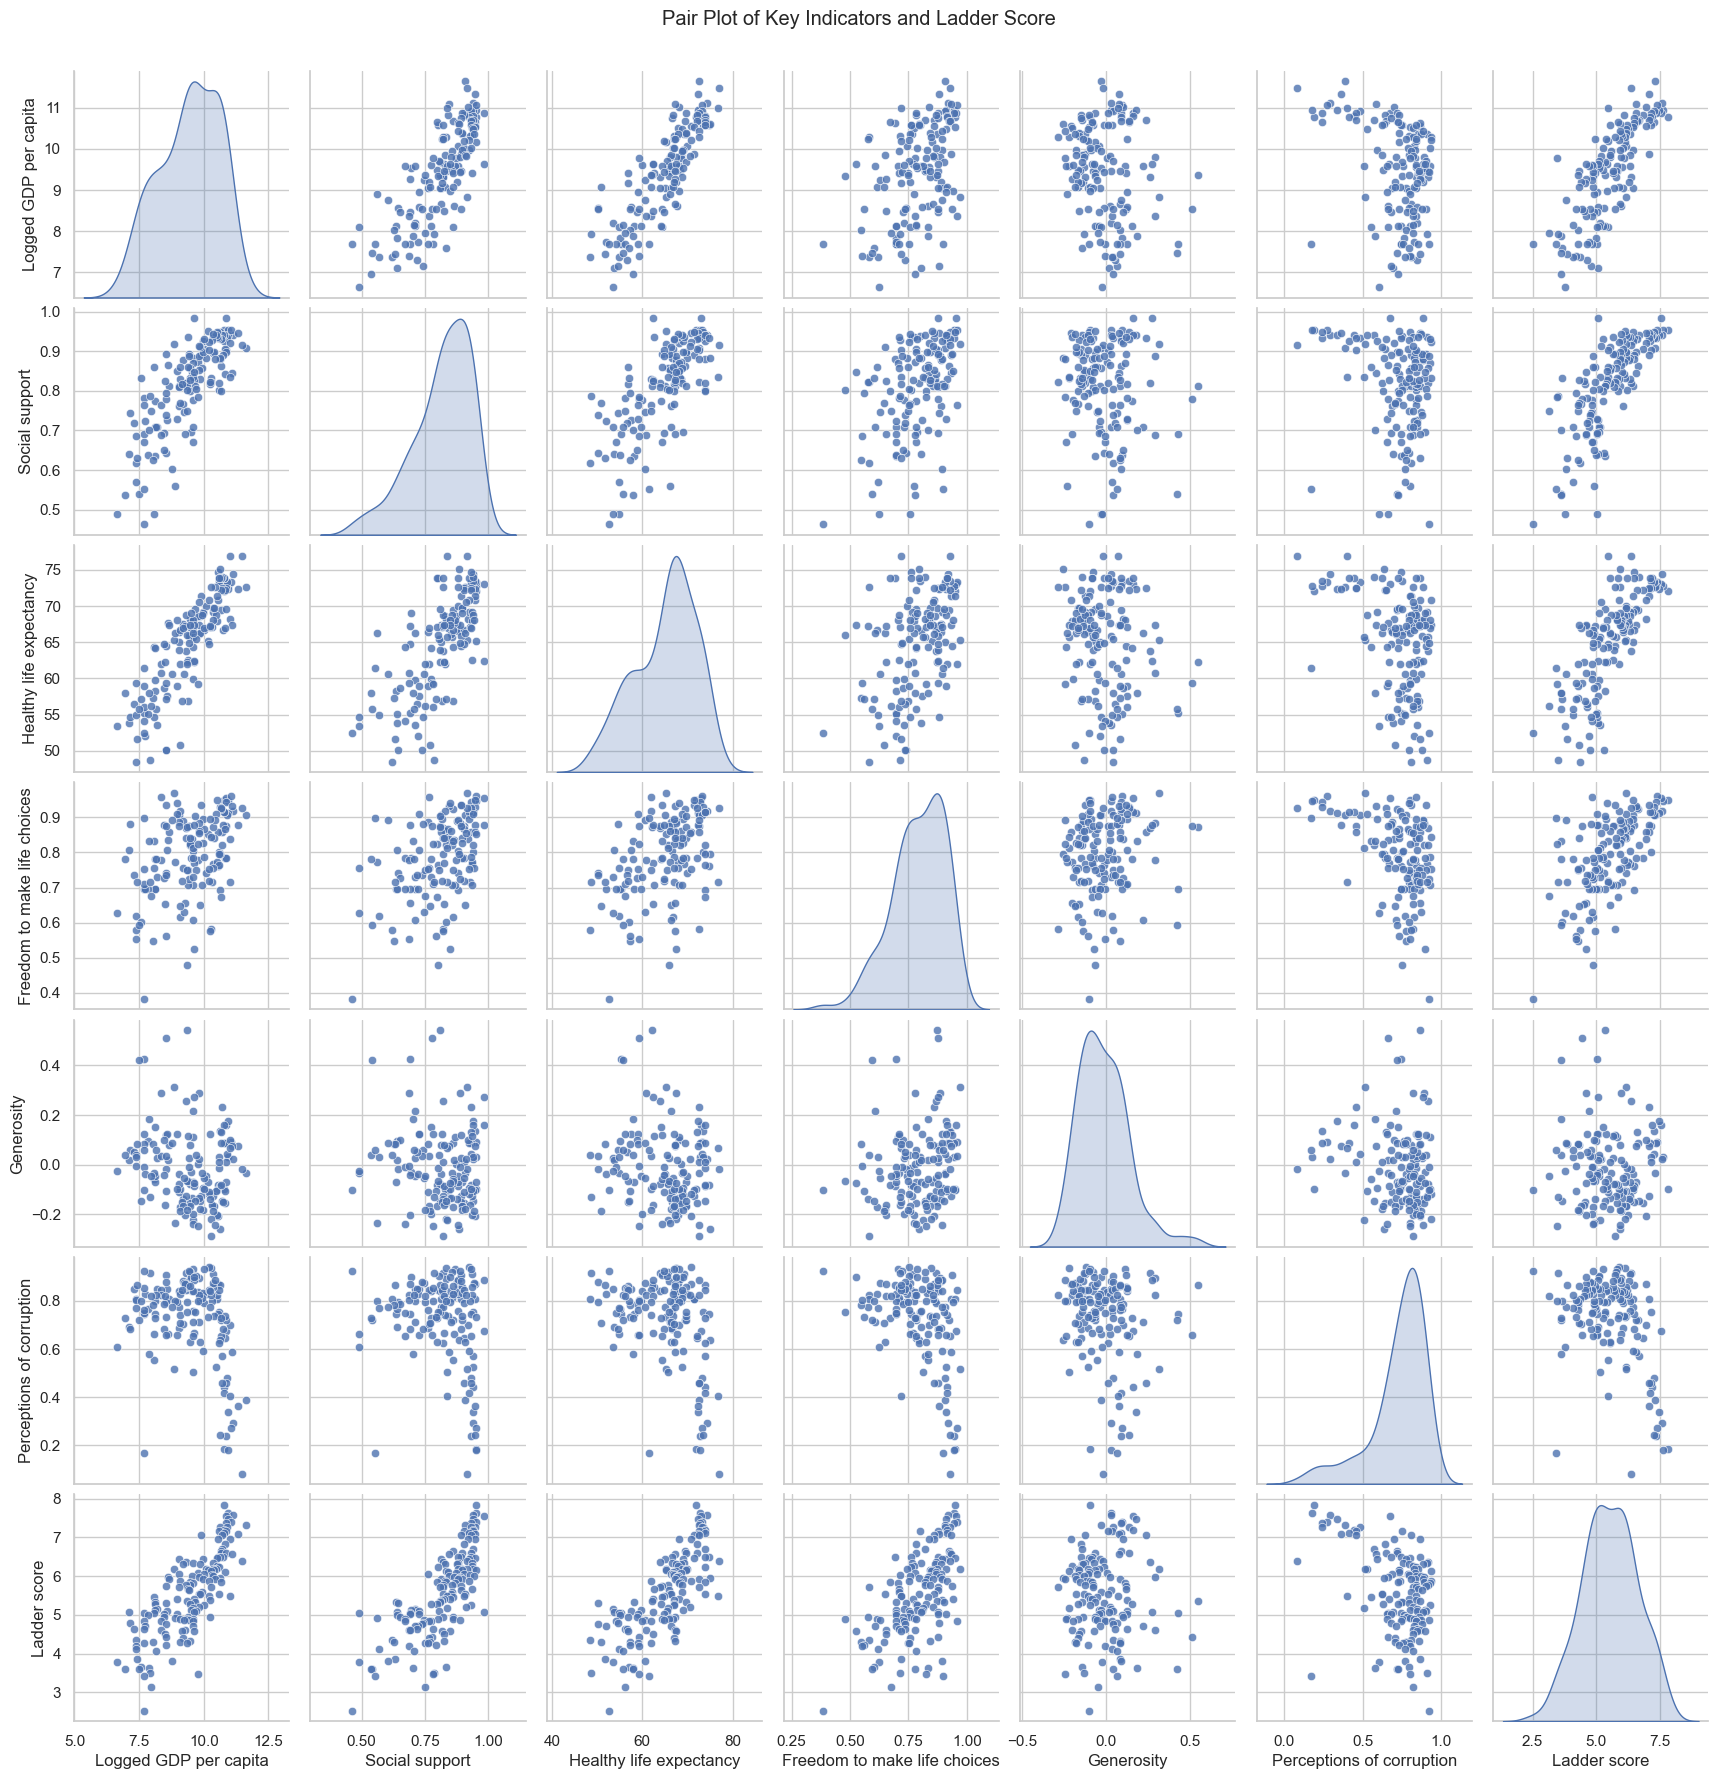

In [25]:
pair_columns = ['Logged GDP per capita',
                'Social support',
                'Healthy life expectancy',
                'Freedom to make life choices',
                'Generosity',
                'Perceptions of corruption',
                'Ladder score']
sns.pairplot(df[pair_columns],diag_kind='kde',plot_kws={'alpha': 0.8})
plt.suptitle('Pair Plot of Key Indicators and Ladder Score', y=1.02)
plt.show()

# Explanation:

**Purpose: To visualize relationships and potential correlations between various factors and the happiness score.**

**Visualization: A matrix of scatter plots for each pair of variables, with KDE plots on the diagonal.**

**Insight: Provides a comprehensive view of how different factors are related to each other and to the happiness score.**

**Conclusion: From the above visualization, we can conclude that Happiness score is directly proportional to the features and factors which has strong relation with Happiness Score, meanwhile the features which has weak relation with happiness score affects the same.**